In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import warnings
import joblib
import os

warnings.filterwarnings("ignore")

# ===== CONFIG =====
DATA_PATH = "C:/Users/user/Desktop/Economy & Finance project/nse_cleaned.csv"

# ===== LOAD NSE CLEANED DATA =====
df = pd.read_csv(DATA_PATH)

# ===== PREPROCESS =====
df.columns = df.columns.str.strip()  # Remove spaces in column names
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(by=['symbol', 'date'])

numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'deliverable_volume']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(method='ffill')

# ===== FEATURE ENGINEERING =====
df['MA5'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(window=5).mean())
df['MA10'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(window=10).mean())
df = df.dropna()


# ===== SYMBOL SELECTION =====
symbols = df['symbol'].unique().tolist()
print("Available Symbols:", symbols)
selected_symbol = input("Enter a symbol from above: ").strip().upper()

if selected_symbol not in symbols:
    raise ValueError("Invalid symbol selected!")

stock_df = df[df['symbol'] == selected_symbol].copy()

# ===== MODEL TRAINING =====
features = ['open', 'high', 'low', 'volume', 'deliverable_volume', 'MA5', 'MA10']
target = 'close'

X = stock_df[features]
y = stock_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# ===== SAVE MODEL AND SCALER WITH SYMBOL NAME =====
model_filename = f"xgb_model_{selected_symbol}.pkl"
scaler_filename = f"scaler_{selected_symbol}.pkl"

joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"\n✅ Model saved as {model_filename}")
print(f"✅ Scaler saved as {scaler_filename}")

# ===== PREDICTION =====
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\n📊 Model Performance for {selected_symbol}:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# ===== LAST PREDICTION =====
latest_features = X_scaled[-1].reshape(1, -1)
predicted_close = model.predict(latest_features)[0]
actual_close = y.iloc[-1]

print(f"\n📅 Latest Date: {stock_df['date'].iloc[-1].strftime('%Y-%m-%d')}")
print(f"✅ Actual Close: {actual_close:.2f}")
print(f"🔮 Predicted Next Close: {predicted_close:.2f}")



Available Symbols: ['20MICRONS', '21STCENMGM', '3IINFOTECH', '3MINDIA', '3PLAND', '5PAISA', '63MOONS', '8KMILES', 'A2ZINFRA', 'AAKASH', 'AARON', 'AARTIDRUGS', 'AARTIIND', 'AARTISURF', 'AARVEEDEN', 'AARVI', 'AAVAS', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABCAPITAL', 'ABFRL', 'ABMINTLTD', 'ACC', 'ACCELYA', 'ACCURACY', 'ACE', 'ADANIENT', 'ADANIGAS', 'ADANIGREEN', 'ADANIPORTS', 'ADANIPOWER', 'ADANITRANS', 'ADFFOODS', 'ADHUNIKIND', 'ADI', 'ADLABS', 'ADORWELD', 'ADROITINFO', 'ADSL', 'ADVANIHOTR', 'ADVENZYMES', 'AEGISCHEM', 'AFFLE', 'AFL', 'AGARIND', 'AGCNET', 'AGRITECH', 'AGROPHOS', 'AHLEAST', 'AHLUCONT', 'AHLWEST', 'AIAENG', 'AIONJSW', 'AIRAN', 'AJANTPHARM', 'AJMERA', 'AKASH', 'AKSHARCHEM', 'AKSHOPTFBR', 'AKZOINDIA', 'ALANKIT', 'ALBERTDAVD', 'ALCHEM', 'ALEMBICLTD', 'ALICON', 'ALKALI', 'ALKEM', 'ALKYLAMINE', 'ALLCARGO', 'ALLSEC', 'ALMONDZ', 'ALOKINDS', 'ALPA', 'ALPHAGEO', 'ALPSINDUS', 'AMARAJABAT', 'AMBER', 'AMBIKCO', 'AMBUJACEM', 'AMDIND', 'AMJLAND', 'AMRUTANJAN', 'ANANDAMRUB', 'ANANTRAJ', 'ANDHRACE

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
import joblib
import os

warnings.filterwarnings("ignore")

# ===== CONFIG =====
DATA_PATH = "C:/Users/user/Desktop/Economy & Finance project/nse_cleaned.csv"

# ===== LOAD NSE CLEANED DATA =====
df = pd.read_csv(DATA_PATH)

# ===== PREPROCESS =====
df.columns = df.columns.str.strip()  # Remove spaces in column names
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(by=['symbol', 'date'])

numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'deliverable_volume']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(method='ffill')

# ===== FEATURE ENGINEERING =====
df['MA5'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(window=5).mean())
df['MA10'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(window=10).mean())
df = df.dropna()


# ===== SYMBOL SELECTION =====
symbols = df['symbol'].unique().tolist()
print("Available Symbols:", symbols)
selected_symbol = input("Enter a symbol from above: ").strip().upper()

if selected_symbol not in symbols:
    raise ValueError("Invalid symbol selected!")

stock_df = df[df['symbol'] == selected_symbol].copy()

# ===== MODEL TRAINING =====
features = ['open', 'high', 'low', 'volume', 'deliverable_volume', 'MA5', 'MA10']
target = 'close'

X = stock_df[features]
y = stock_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# ===== SAVE MODEL AND SCALER WITH SYMBOL NAME =====
model_filename = f"xgb_model_{selected_symbol}.pkl"
scaler_filename = f"scaler_{selected_symbol}.pkl"

joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"\n✅ Model saved as {model_filename}")
print(f"✅ Scaler saved as {scaler_filename}")

# ===== PREDICTION =====
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance for {selected_symbol}:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# ===== LAST PREDICTION =====
latest_features = X_scaled[-1].reshape(1, -1)
predicted_close = model.predict(latest_features)[0]
actual_close = y.iloc[-1]

print(f"\n📅 Latest Date: {stock_df['date'].iloc[-1].strftime('%Y-%m-%d')}")
print(f"✅ Actual Close: {actual_close:.2f}")
print(f"🔮 Predicted Next Close: {predicted_close:.2f}")


Available Symbols: ['20MICRONS', '21STCENMGM', '3IINFOTECH', '3MINDIA', '3PLAND', '5PAISA', '63MOONS', '8KMILES', 'A2ZINFRA', 'AAKASH', 'AARON', 'AARTIDRUGS', 'AARTIIND', 'AARTISURF', 'AARVEEDEN', 'AARVI', 'AAVAS', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABCAPITAL', 'ABFRL', 'ABMINTLTD', 'ACC', 'ACCELYA', 'ACCURACY', 'ACE', 'ADANIENT', 'ADANIGAS', 'ADANIGREEN', 'ADANIPORTS', 'ADANIPOWER', 'ADANITRANS', 'ADFFOODS', 'ADHUNIKIND', 'ADI', 'ADLABS', 'ADORWELD', 'ADROITINFO', 'ADSL', 'ADVANIHOTR', 'ADVENZYMES', 'AEGISCHEM', 'AFFLE', 'AFL', 'AGARIND', 'AGCNET', 'AGRITECH', 'AGROPHOS', 'AHLEAST', 'AHLUCONT', 'AHLWEST', 'AIAENG', 'AIONJSW', 'AIRAN', 'AJANTPHARM', 'AJMERA', 'AKASH', 'AKSHARCHEM', 'AKSHOPTFBR', 'AKZOINDIA', 'ALANKIT', 'ALBERTDAVD', 'ALCHEM', 'ALEMBICLTD', 'ALICON', 'ALKALI', 'ALKEM', 'ALKYLAMINE', 'ALLCARGO', 'ALLSEC', 'ALMONDZ', 'ALOKINDS', 'ALPA', 'ALPHAGEO', 'ALPSINDUS', 'AMARAJABAT', 'AMBER', 'AMBIKCO', 'AMBUJACEM', 'AMDIND', 'AMJLAND', 'AMRUTANJAN', 'ANANDAMRUB', 'ANANTRAJ', 'ANDHRACE

In [16]:
# single_symbol_fast_pipeline.py

import pandas as pd
import numpy as np
import warnings
import os
import argparse
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

warnings.filterwarnings("ignore")


# ========= Feature Engineering =========
def create_technical_features(df):
    df = df.copy()
    df["EMA_10"] = df["close"].ewm(span=10, adjust=False).mean()
    df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()
    df["MACD"] = df["EMA_12"] = df["close"].ewm(span=12, adjust=False).mean() - df["close"].ewm(span=26, adjust=False).mean()

    # RSI
    delta = df["close"].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(14).mean()
    avg_loss = pd.Series(loss).rolling(14).mean()
    rs = avg_gain / avg_loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    sma20 = df["close"].rolling(window=20).mean()
    std20 = df["close"].rolling(window=20).std()
    df["BB_upper"] = sma20 + (2 * std20)
    df["BB_lower"] = sma20 - (2 * std20)

    # Stochastic Oscillator
    low14 = df["low"].rolling(14).min()
    high14 = df["high"].rolling(14).max()
    df["%K"] = 100 * (df["close"] - low14) / (high14 - low14)
    df["%D"] = df["%K"].rolling(3).mean()

    # Lags
    for lag in [1, 2, 3, 5]:
        df[f"lag_{lag}"] = df["close"].shift(lag)

    # Drop NaNs
    df.dropna(inplace=True)
    return df


# ========= Model Training =========
def train_and_select_best(X_train, y_train, X_test, y_test, show_logs):
    models = {
        "XGBoost": (
            XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1),
            {
                "n_estimators": [200, 500],
                "max_depth": [3, 6, 9],
                "learning_rate": [0.01, 0.05, 0.1],
                "subsample": [0.7, 1.0]
            }
        ),
        "LightGBM": (
            LGBMRegressor(random_state=42, n_jobs=-1),
            {
                "n_estimators": [200, 500],
                "max_depth": [-1, 6, 9],
                "learning_rate": [0.01, 0.05, 0.1],
                "num_leaves": [31, 50]
            }
        ),
        "CatBoost": (
            CatBoostRegressor(verbose=0, random_state=42),
            {
                "iterations": [300, 500],
                "depth": [4, 6, 8],
                "learning_rate": [0.01, 0.05, 0.1]
            }
        ),
        "RandomForest": (
            RandomForestRegressor(random_state=42, n_jobs=-1),
            {
                "n_estimators": [200, 500],
                "max_depth": [None, 6, 10],
                "min_samples_split": [2, 5]
            }
        )
    }

    leaderboard = []
    best_model = None
    best_score = -np.inf

    for name, (model, params) in models.items():
        if show_logs:
            print(f"\n🔍 Training {name}...")
        search = RandomizedSearchCV(
            model, params, n_iter=6, cv=2, scoring="r2",
            verbose=0 if not show_logs else 1, n_jobs=-1, random_state=42
        )
        search.fit(X_train, y_train)
        preds = search.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        leaderboard.append([name, r2, mae, rmse])

        if r2 > best_score:
            best_score = r2
            best_model = search.best_estimator_

    leaderboard_df = pd.DataFrame(leaderboard, columns=["Model", "R2", "MAE", "RMSE"]).sort_values("R2", ascending=False)
    return best_model, leaderboard_df


# ========= Main Pipeline =========
def run_pipeline(symbol, csv_path, show_logs=False):
    df = pd.read_csv(csv_path)
    df_symbol = df[df["symbol"] == symbol].copy()

    if df_symbol.empty:
        raise ValueError(f"Symbol {symbol} not found in dataset.")

    df_symbol = create_technical_features(df_symbol)

    X = df_symbol.drop(columns=["date", "symbol", "close"])
    y = df_symbol["close"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_model, leaderboard_df = train_and_select_best(X_train_scaled, y_train, X_test_scaled, y_test, show_logs)

    # Predictions
    preds = best_model.predict(X_test_scaled)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual")
    plt.plot(preds, label="Predicted")
    plt.title(f"{symbol} - Predicted vs Actual")
    plt.legend()
    plt.tight_layout()
    os.makedirs("models_single_symbol", exist_ok=True)
    plot_path = f"models_single_symbol/{symbol}_pred_vs_actual.png"
    plt.savefig(plot_path)
    plt.close()

    # Save model & scaler
    import joblib
    model_path = f"models_single_symbol/{symbol}_best_model.pkl"
    scaler_path = f"models_single_symbol/{symbol}_scaler.pkl"
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)

    leaderboard_path = f"models_single_symbol/{symbol}_leaderboard.csv"
    leaderboard_df.to_csv(leaderboard_path, index=False)

    print(f"\n✅ Best model saved to {model_path}")
    print(f"📊 Leaderboard saved to {leaderboard_path}")
    print(f"📈 Plot saved to {plot_path}")

    return leaderboard_df


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--symbol", type=str, required=True, help="Stock symbol to train")
    parser.add_argument("--csv_path", type=str, default="nse_cleaned.csv", help="Path to CSV file")
    parser.add_argument("--show_logs", action="store_true", help="Show training logs")
    args = parser.parse_args()

    leaderboard = run_pipeline(args.symbol, args.csv_path, args.show_logs)
    print("\n=== Leaderboard ===")
    print(leaderboard)


usage: ipykernel_launcher.py [-h] --symbol SYMBOL [--csv_path CSV_PATH]
                             [--show_logs]
ipykernel_launcher.py: error: the following arguments are required: --symbol


SystemExit: 2


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


XGB → R²: -1.2847 | Best Params: {'max_depth': 3, 'learning_rate': 0.05}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5861
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 23
[LightGBM] [Info] Start training from score 1206.147721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

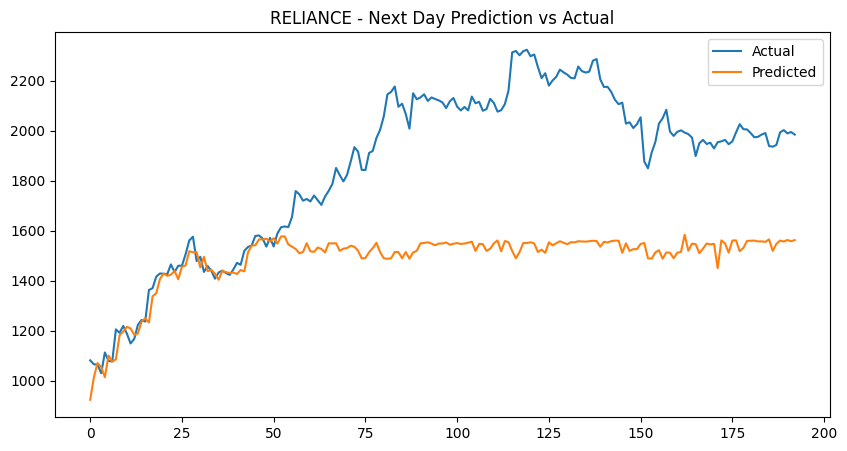

Saved model and scaler for RELIANCE in current directory.
Saved model and scaler for RELIANCE in C:/Users/user/Desktop/Economy & Finance project/models


In [15]:
# Install extra libraries
!pip install lightgbm catboost xgboost ta --quiet

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import ta 
warnings.filterwarnings("ignore")
import os

warnings.filterwarnings("ignore")

# ===== CONFIG =====
DATA_PATH = "C:/Users/user/Desktop/Economy & Finance project/nse_cleaned.csv"
symbol = input("Enter stock symbol: ").strip().upper()

# ===== LOAD DATA =====
df = pd.read_csv(DATA_PATH)
df = df[df['symbol'] == symbol].copy()
if df.empty:
    raise ValueError(f"No data found for symbol '{symbol}'")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# ===== FEATURE ENGINEERING =====
df['ema_10'] = ta.trend.EMAIndicator(df['close'], 10).ema_indicator()
df['ema_30'] = ta.trend.EMAIndicator(df['close'], 30).ema_indicator()
df['rsi'] = ta.momentum.RSIIndicator(df['close'], 14).rsi()
df['range'] = df['high'] - df['low']
df['returns'] = df['close'].pct_change()
df['volume_change'] = df['volume'].pct_change()

# Lag features
for lag in [1, 2, 3, 5, 10]:
    df[f'close_lag_{lag}'] = df['close'].shift(lag)

# Target = next day close
df['target'] = df['close'].shift(-1)

df = df.dropna()

# ===== TRAIN/TEST SPLIT =====
X = df.drop(columns=['date', 'symbol', 'close', 'target'])
X = X.select_dtypes(include=[np.number])  # numeric only
y = df['target']

split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# ===== SCALING =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== MODELS & PARAMS =====
models = {
    "XGB": (XGBRegressor(objective='reg:squarederror', n_estimators=800, random_state=42),
            {'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}),
    "LGBM": (LGBMRegressor(random_state=42),
             {'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [31, 50, 70]}),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42),
                 {'learning_rate': [0.01, 0.05, 0.1], 'depth': [4, 6, 8]}),
    "RF": (RandomForestRegressor(random_state=42),
           {'n_estimators': [200, 400], 'max_depth': [5, 10, None]})
}

#results = []

# ===== TRAIN & EVALUATE =====
#for name, (model, params) in models.items():
   # search = RandomizedSearchCV(model, params, n_iter=5, cv=2, scoring='r2', n_jobs=-1, verbose=0)
   #search.fit(X_train_scaled, y_train)
    #best_model = search.best_estimator_
    #preds = best_model.predict(X_test_scaled)
    #r2 = r2_score(y_test, preds)
    #results.append((name, r2, search.best_params_))
    #print(f"{name} → R²: {r2:.4f} | Best Params: {search.best_params_}")

# Pick best model
#best_name, best_r2, best_params = max(results, key=lambda x: x[1])
#final_model = dict(results=[(n, m, p) for n, m, p in results if n == best_name])[0]
#final_model = [p for (n, m, p) in results if n == best_name][0]
# ===== FINAL EVAL =====
#best_model = [m for (n, r, p) in results if n == best_name][0]
#preds = best_model.predict(X_test_scaled)

# Pick best model
#best_name, best_r2, best_params = max(results, key=lambda x: x[1])

# Get the trained model object
#best_model = [p for (n, r, p) in results if n == best_name][0]

# Predict
#preds = best_model.predict(X_test_scaled)

#print("\nBest Model:", best_name)
#print("Best R² Score:", best_r2)



#print("\nBest Model:", best_name)
#print("R²:", r2_score(y_test, preds))
#print("MAE:", mean_absolute_error(y_test, preds))
#print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))  # version-proof

# ===== PLOT =====
#plt.figure(figsize=(10, 5))
#plt.plot(y_test.values, label="Actual")
#plt.plot(preds, label="Predicted")
#plt.legend()
#plt.title(f"{symbol} - Next Day Prediction vs Actual")
#plt.show()

# ===== SAVE MODEL =====
#joblib.dump(best_model, f"/content/{symbol}_best_model.pkl")
#joblib.dump(scaler, f"/content/{symbol}_scaler.pkl")
#print(f"Saved model and scaler for {symbol} in /content/")

results = []

# ===== TRAIN & EVALUATE =====
for name, (model, params) in models.items():
    search = RandomizedSearchCV(model, params, n_iter=5, cv=2, scoring='r2', n_jobs=-1, verbose=0)
    search.fit(X_train_scaled, y_train)
    
    best_model = search.best_estimator_
    preds = best_model.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)
    
    # Store the trained model along with its R² and best params
    results.append((name, r2, best_model, search.best_params_))
    
    print(f"{name} → R²: {r2:.4f} | Best Params: {search.best_params_}")

# ===== PICK BEST MODEL =====
best_name, best_r2, best_model, best_params = max(results, key=lambda x: x[1])

# ===== FINAL EVALUATION =====
preds = best_model.predict(X_test_scaled)

print("\nBest Model:", best_name)
print("Best R² Score:", best_r2)
print("Best Params:", best_params)
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

# ===== PLOT =====
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()
plt.title(f"{symbol} - Next Day Prediction vs Actual")
plt.show()

# ===== SAVE MODEL =====
joblib.dump(best_model, f"{symbol}_best_model.pkl")
joblib.dump(scaler, f"{symbol}_scaler.pkl")
print(f"Saved model and scaler for {symbol} in current directory.")


save_dir = "C:/Users/user/Desktop/Economy & Finance project/models"
os.makedirs(save_dir, exist_ok=True)

joblib.dump(best_model, f"{save_dir}/{symbol}_best_model.pkl")
joblib.dump(scaler, f"{save_dir}/{symbol}_scaler.pkl")
print(f"Saved model and scaler for {symbol} in {save_dir}")


#joblib.dump(best_model, f"/content/{symbol}_best_model.pkl")
#joblib.dump(scaler, f"/content/{symbol}_scaler.pkl")
#print(f"Saved model and scaler for {symbol} in /content/")

